<a href="https://colab.research.google.com/github/JCaballerot/Programacion_en_Python/blob/main/modulo6/Estad%C3%ADstica_para_el_an%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ctic.uni.edu.pe/wp-content/uploads/2022/04/588px-x-348px-web-1.png" alt="HTML5 Icon" width="900" height="350" >



<h1 align=center><font size = 5>Taller de Estadística para el análisis de datos</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para realizar limpieza de datos y feature engineering

## 1. Descargar y analizar Dataset

### Esta es la legendaria competencia Titanic ML




El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" width="800" 
     height="400">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo 
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


In [1]:
# Importando librerías

import pandas as pd
import numpy as np
import seaborn as sns


In [18]:
# leer la data desde una archivo csv
titanic = pd.read_csv('train_titanic.csv', delimiter = ",")


In [ ]:
# Visualizar parte de la tabla 
titanic.head(10)

In [ ]:
titanic.dtypes

In [ ]:
titanic.Age

### Promedio

In [ ]:
titanic.Age.sum()/titanic.Age.count()


In [ ]:
titanic.Age.mean()


In [ ]:
valores = np.array([12, 15.5, 18, 190])
valores.mean()


### Promedio ponderado

In [ ]:
valores = np.array([12, 15.5, 18])
ponderacion = np.array([2, 1, 3])

valores_ponderados = valores*ponderacion
valores_ponderados.sum()/ponderacion.sum()



In [ ]:
valores.mean()

### Mediana

In [ ]:
titanic.Age.median()

In [ ]:
valores = np.array([12, 15.5, 18, 190])
np.median(valores, axis=0)

### Desviación estándar

In [ ]:
titanic.Age.std()

### Percentiles

In [ ]:
arry = np.array(titanic.Age.dropna())


In [ ]:
percentile = np.percentile(arry, 50)
percentile

In [ ]:
np.percentile(arry, 25)

In [ ]:
np.percentile(arry, 75)

### varianza

In [ ]:
valores = np.array(titanic.Age.dropna())
np.var(valores, axis=0)

In [ ]:
np.std(valores, axis=0)

### Rango Intercuartilico

In [ ]:
RIC = np.percentile(arry, 75) - np.percentile(arry, 25)
RIC

### Coeficiente de variación

In [ ]:
cv_age = np.std(valores, axis=0)/np.mean(valores, axis=0)
cv_age

In [ ]:
cv_fare = np.std(np.array(titanic.Fare.dropna()), axis=0)/np.mean(np.array(titanic.Fare.dropna()), axis=0)
cv_fare

### Diagramas de caja

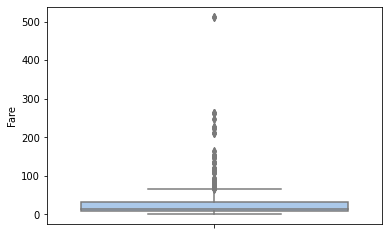

In [6]:
sns.set_palette('pastel')
sns.boxplot(y = titanic["Fare"])

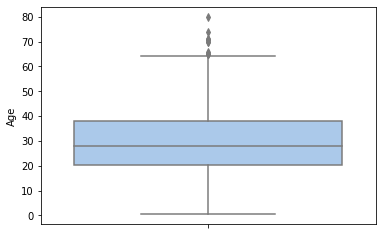

In [7]:
sns.set_palette('pastel')
sns.boxplot(y = titanic["Age"])

### Identificación de Outliers por Rango Intercuantilico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

In [ ]:
# Estadisticos básicos de la tabla
titanic.describe().transpose()

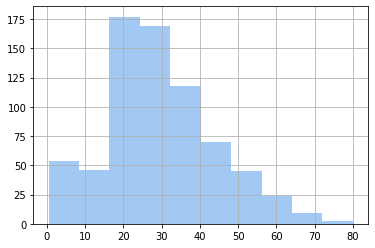

In [17]:

titanic["Age"].hist()



In [46]:

# Z - score
# amplitud: 1.5

arry = np.array(titanic.Age.dropna())

Q3 = np.percentile(arry, 75)
Q1 = np.percentile(arry, 25)
RIC = np.percentile(arry, 75) - np.percentile(arry, 25)

ls = Q3 + 1.5*RIC
li = Q1 - 1.5*RIC

titanic['Age_t'] = titanic.Age.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)

print(ls)
print(li)

64.8125
-6.6875


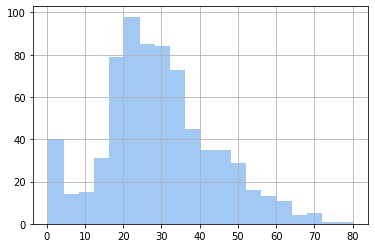

In [43]:
titanic['Age'].hist(bins=20)

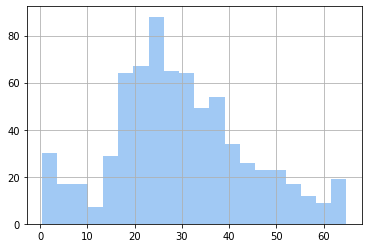

In [44]:
titanic['Age_t'].hist(bins=20)

In [45]:

# Z - score
# amplitud: 3

arry = np.array(titanic.Age.dropna())

Q3 = np.percentile(arry, 75)
Q1 = np.percentile(arry, 25)
RIC = np.percentile(arry, 75) - np.percentile(arry, 25)

ls = Q3 + 3*RIC
li = Q1 - 3*RIC

titanic['Age_t'] = titanic.Age.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)

print(ls)
print(li)

91.625
-33.5


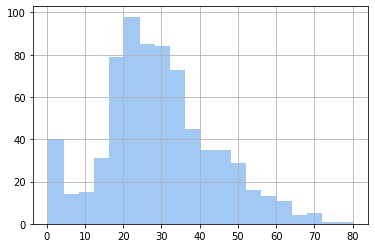

In [40]:
titanic['Age'].hist(bins=20)

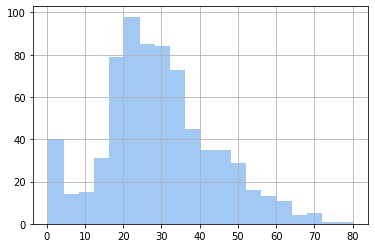

In [41]:
titanic['Age_t'].hist(bins=20)

### Identificación de Outliers por Percentiles

62.0
2.0


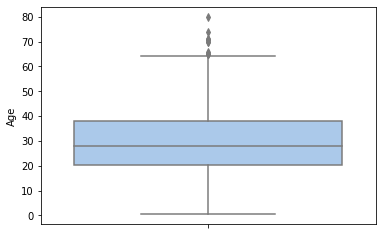

In [35]:

arry = np.array(titanic.Age.dropna())

ls = np.percentile(arry, 97.5)
li = np.percentile(arry, 2.5)

titanic['Age_t'] = titanic.Age.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)

print(ls)
print(li)
sns.boxplot(y = titanic["Age"])

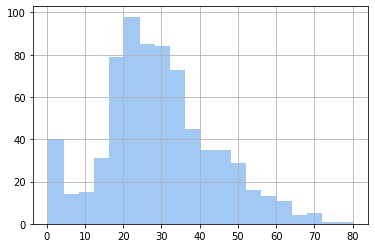

In [32]:
titanic['Age'].hist(bins=20)

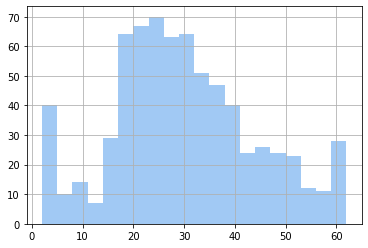

In [33]:
titanic['Age_t'].hist(bins=20)

### Diagrama de distribución

In [ ]:
# Histograma en seaborn
sns.set_style('darkgrid')
sns.set_palette('winter')

sns.displot(titanic, x = 'Age', bins=10, kde=True)

In [ ]:
# Histograma en seaborn
sns.set_style('darkgrid')
sns.set_palette('winter')

sns.displot(titanic, x = 'Fare', bins=10, kde=True)

In [ ]:
arry = np.array(titanic.Fare.dropna())
Q3 = np.percentile(arry, 75)
Q1 = np.percentile(arry, 25)

Q3 + 1.5*(Q3 - Q1)

In [ ]:
# Histograma en seaborn
sns.set_style('darkgrid')
sns.set_palette('winter')

sns.displot(titanic.loc[titanic.Fare < 65.6244], x = 'Fare', bins=10, kde=True)

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('winter')

sns.boxplot(titanic.loc[titanic.Fare < 65.6244].Fare)